In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import seaborn as sns
plt.style.use('ggplot')
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
draft = pd.read_csv('Fantasy_2018_Draft_Rankings.csv')

In [3]:
draft['Pos_Rank'] = draft['Pos'].str.extract('(\d+)')
draft['pos'] = draft['Pos'].str.extract(r'([A-Z]+)')

In [4]:
X = draft[['Rank','Pos_Rank','Best', 'Worst', 'ADP']]
X = X.fillna(X.median())
X = StandardScaler().fit_transform(X.values)

In [5]:
lowest_bic = np.infty
bic = []
n_components_range = range(1, 51)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components,max_iter=500,
                                      covariance_type=cv_type,random_state=42)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic: 
            lowest_bic = bic[-1]
            best_gmm = gmm

In [6]:
best_gmm.fit(X)
tier = best_gmm.predict(X)
draft['Tier'] = tier

In [7]:
np.unique(tier, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([62, 20, 32, 44, 28, 25,  6, 45, 11, 23, 48]))

In [8]:
draft = draft[['Tier','Rank','Pos_Rank','Overall','Team','pos','Best', 'Worst','Avg','ADP']]

In [9]:
order = []
for i in range(len(np.unique(tier))):
    j = draft[draft['Tier'] == i][['Rank']].min()[0]    
    order.append((i,j))
labels = [i[0] for i in sorted(order, key=lambda tup: tup[1])]
ordered_labels = list(i+1 for i in range(len(order)))
ordered_tier = []
for i in tier:
    loc = labels.index(i)
    ordered_tier.append(ordered_labels[loc])
draft['draft_tier'] = ordered_tier

In [10]:
draft = draft.rename(str.lower, axis='columns')

In [11]:
draft.set_index(['draft_tier', 'pos', 'pos_rank'], inplace=True, drop=False)
draft = draft.sort_index(level='draft_tier')

In [12]:
draft.head()

tier  rank pos_rank          overall team pos  best  \
draft_tier pos pos_rank                                                        
1          RB  1            2   1.0        1      Todd Gurley  LAR  RB   1.0   
               10           2  15.0       10      Dalvin Cook  MIN  RB  12.0   
               11           2  18.0       11  Devonta Freeman  ATL  RB  14.0   
               12           2  22.0       12    Jordan Howard  CHI  RB  17.0   
               14           2  24.0       14        Joe Mixon  CIN  RB  21.0   

                         worst   avg   adp  draft_tier  
draft_tier pos pos_rank                                 
1          RB  1           3.0   1.4   1.0           1  
               10         20.0  15.3  13.0           1  
               11         23.0  17.8  17.0           1  
               12         28.0  23.5  21.0           1  
               14         32.0  25.8  23.0           1

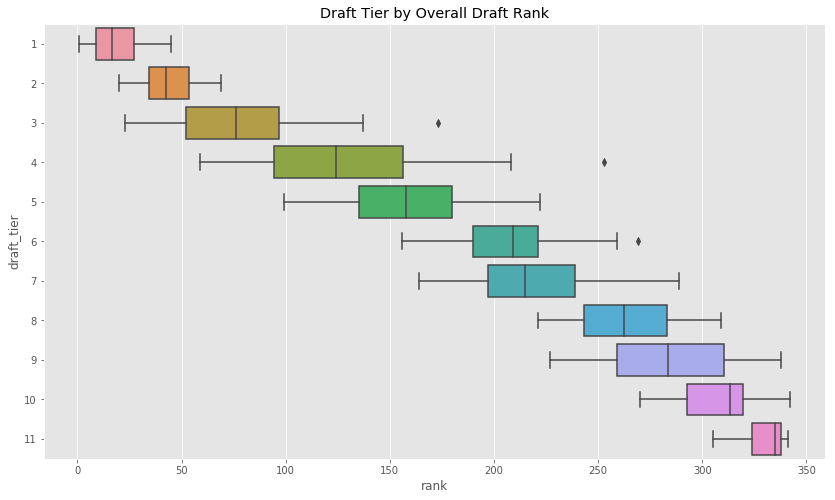

In [13]:
plt.figure(figsize=(14,8))
plt.title("Draft Tier by Overall Draft Rank")
ax = sns.boxplot(data=draft, x='rank', y='draft_tier', orient="h")

In [14]:
draft = draft[['rank','overall', 'team', 'pos']].sort_values('rank')

In [15]:
draft.to_csv('draft2018.csv')

In [16]:
df = pd.read_csv('draft2018.csv')

In [17]:
df.head(10)

,draft_tier,pos,pos_rank,rank,overall,team,pos.1
0,1,RB,1.0,1.0,Todd Gurley,LAR,RB
1,1,RB,2.0,2.0,Le'Veon Bell,PIT,RB
2,1,RB,3.0,3.0,Ezekiel Elliott,DAL,RB
3,1,RB,4.0,4.0,David Johnson,ARI,RB
4,1,WR,1.0,5.0,Antonio Brown,PIT,WR
5,1,RB,5.0,6.0,Alvin Kamara,NO,RB
6,1,RB,6.0,7.0,Saquon Barkley,NYG,RB
7,1,WR,2.0,8.0,DeAndre Hopkins,HOU,WR
8,1,RB,7.0,9.0,Melvin Gordon,LAC,RB
9,1,WR,3.0,10.0,Odell Beckham Jr.,NYG,WR
